In [1]:
# importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/meetsudra/Desktop/SUPERVISED MACHINE LEARNING/sparksfoundation/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# .info() to check null values in the data
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.drop('Id',axis=1,inplace=True)

The dataset here is a input output based data i.e labelled data wherein, the records of 4 different features classifies 3 species namely Iris-setosa, Iris-versicolor, and Iris-virginica and since there is no inconsistency in the data it is good to go with the data visualization part  





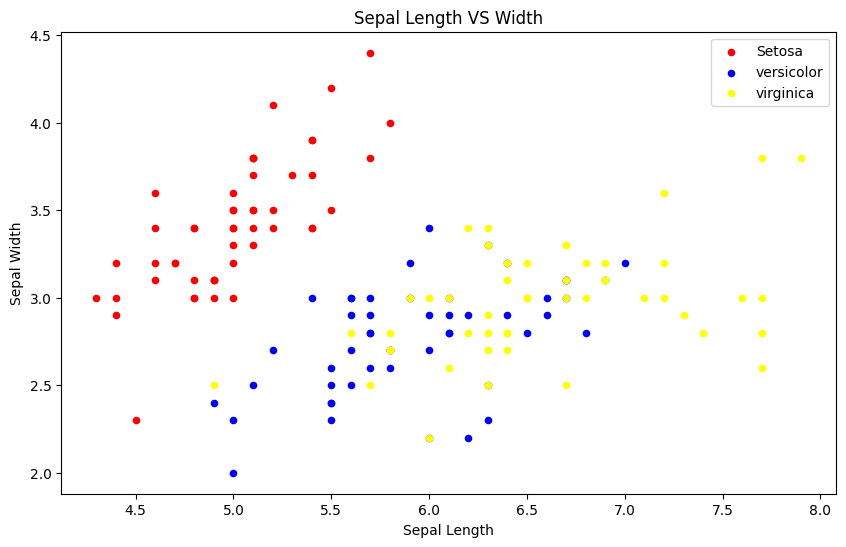

In [6]:
import matplotlib.pyplot as plt

graph = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=graph)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='yellow', label='virginica', ax=graph)
graph.set_xlabel("Sepal Length")
graph.set_ylabel("Sepal Width")
graph.set_title("Sepal Length VS Width")
graph=plt.gcf()
graph.set_size_inches(10,6)
plt.show()


a scatter plot to visually compare the relationship between sepal length and sepal width for three different species of the Iris flower

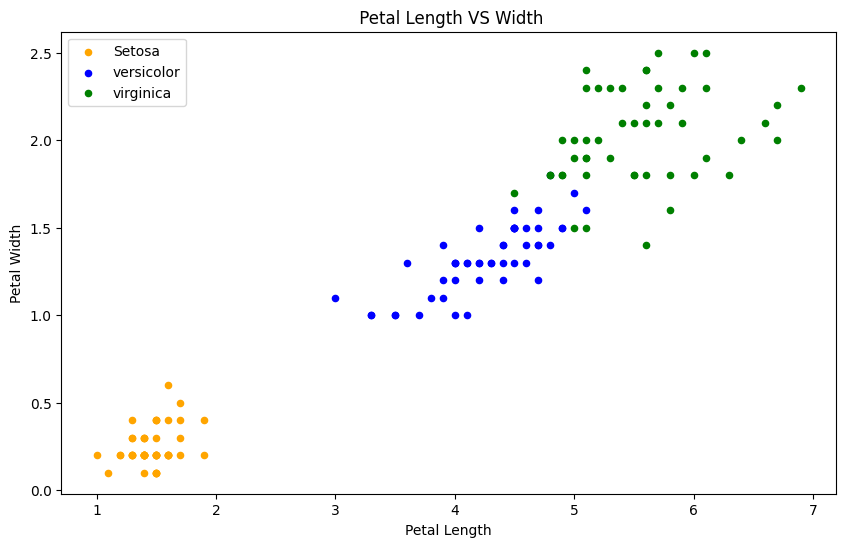

In [7]:
plot2 = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=plot2)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=plot2)
plot2.set_xlabel("Petal Length")
plot2.set_ylabel("Petal Width")
plot2.set_title(" Petal Length VS Width")
plot2=plt.gcf()
plot2.set_size_inches(10,6)
plt.show()


a scatter plot to compare the relationship between petal length and petal width for three different species of the Iris flower: Iris-setosa, Iris-versicolor, and Iris-virginica
petals give a better classification of these species and forms applealing clusters

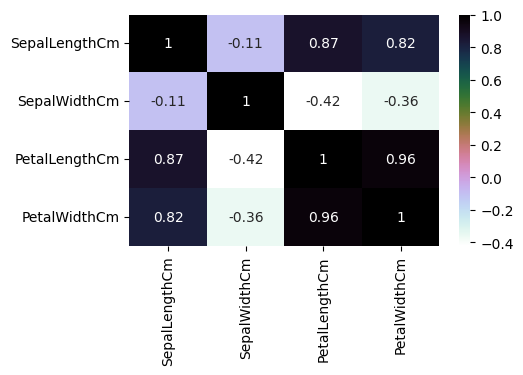

In [8]:
data_copy = data.copy()
data_copy = data_copy.drop(columns=['Species'])
correlation_matrix = data_copy.corr()

plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix_r')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [10]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species

In [11]:
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
test_y =test.Species

In [12]:
train_y.head() # output of training data

36         Iris-setosa
129     Iris-virginica
87     Iris-versicolor
98     Iris-versicolor
54     Iris-versicolor
Name: Species, dtype: object

In [13]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [14]:
model.fit(train_X,train_y)

DecisionTreeClassifier()

In [15]:
prediction=model.predict(test_X)



In [16]:
print(prediction)

['Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica']


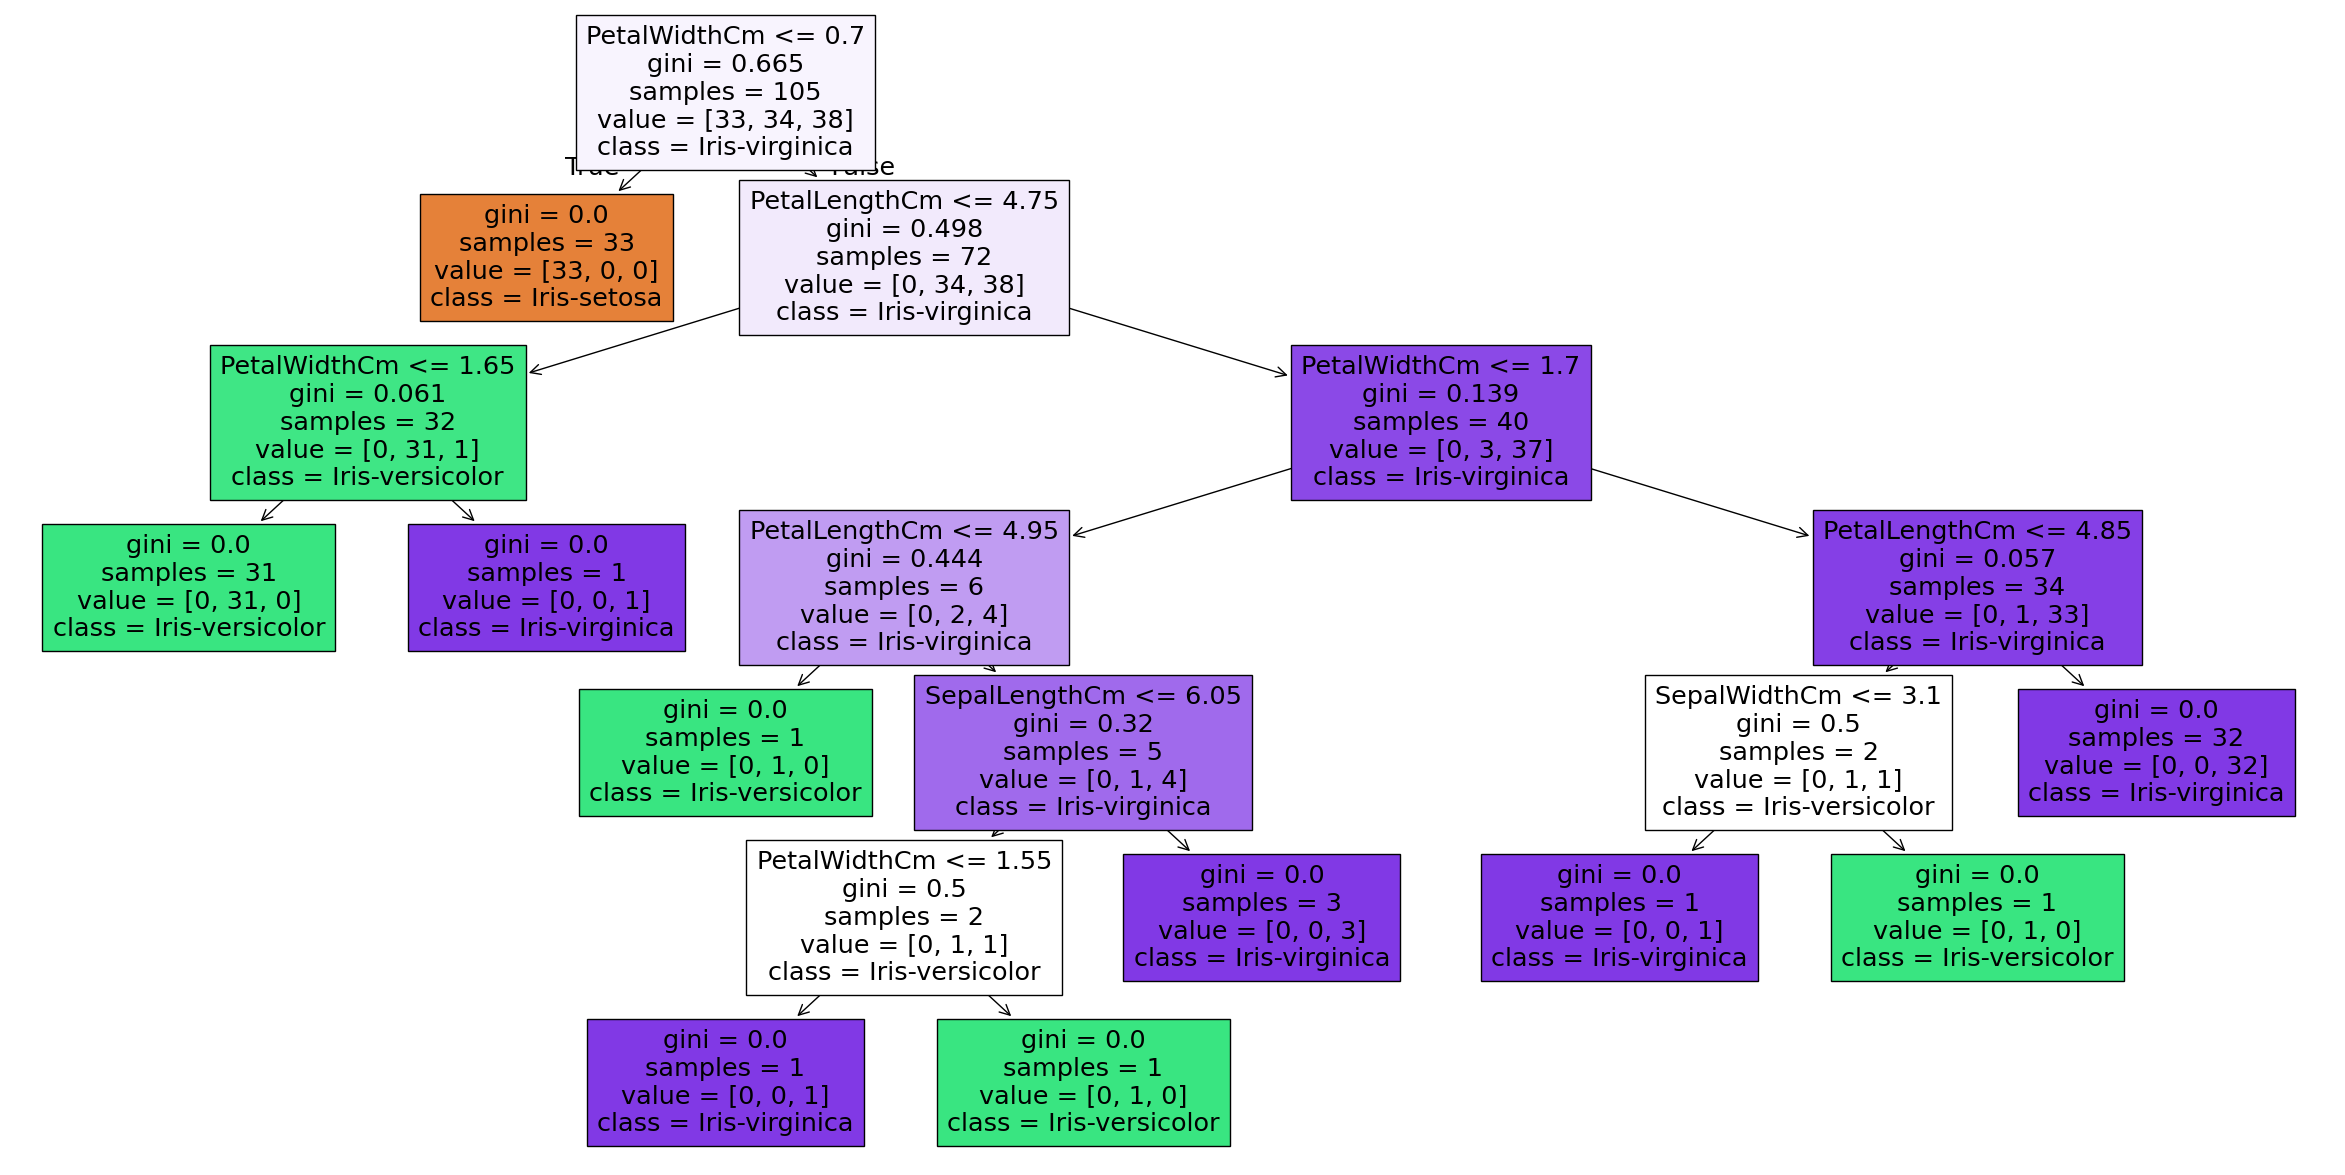

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 

plt.figure(figsize=(30,15))  # Adjust the size as needed
plot_tree(model, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], class_names=model.classes_, filled=True)
plt.show()

In [20]:
new_data = np.array([[5.1, 3.5, 1.4, 0.2], [6.7, 3.1, 4.7, 1.5]])


In [21]:
predictions = model.predict(new_data)

# Print the predictions
print("Predicted classes for the new data:", predictions)


Predicted classes for the new data: ['Iris-setosa' 'Iris-versicolor']


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
from sklearn.metrics import accuracy_score 
test_predictions = model.predict(test_X)
accuracy = accuracy_score(test_y, test_predictions)
print("Model accuracy on the test set:", accuracy)


Model accuracy on the test set: 0.9777777777777777
